In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [155]:
%pwd

'/Users/adityakinjawadekar/Documents/100xdata/used-car-prices/data'

In [156]:
os.chdir('/Users/adityakinjawadekar/Documents/100xdata/used-car-prices/data')
df = pd.read_csv('./data.csv')
df.drop(columns=['id'], inplace=True)

In [157]:
df.shape[0]

188533

In [158]:
df.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [159]:
df["fuel_type"] = df["fuel_type"].map(lambda x: '0' if pd.isna(x) or x == '–' else x)
df = df[(df["fuel_type"] != '0') & (df["fuel_type"] != "not supported")]


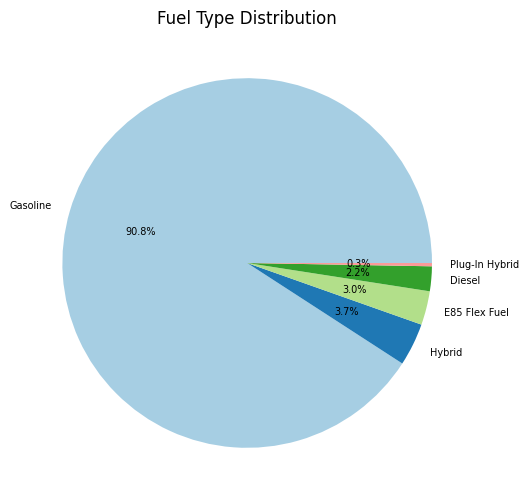

In [160]:
fuel_counts = df["fuel_type"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    fuel_counts, 
    labels=fuel_counts.index, 
    autopct="%1.1f%%", 
    # startangle=90, 
    colors=plt.cm.Paired.colors,
    textprops={"fontsize": 7} 
)

plt.title("Fuel Type Distribution")
plt.show()

In [161]:
df.accident

0                                  None reported
1         At least 1 accident or damage reported
2                                  None reported
3                                  None reported
4                                  None reported
                           ...                  
188528                             None reported
188529    At least 1 accident or damage reported
188530                             None reported
188531                             None reported
188532                             None reported
Name: accident, Length: 182654, dtype: object

In [162]:
df.accident = df.accident.fillna(0)




In [163]:
df.accident.unique()

array(['None reported', 'At least 1 accident or damage reported', 0],
      dtype=object)

In [164]:
df.accident = df.accident.map(lambda x : 0 if x == 'None reported' else 1)


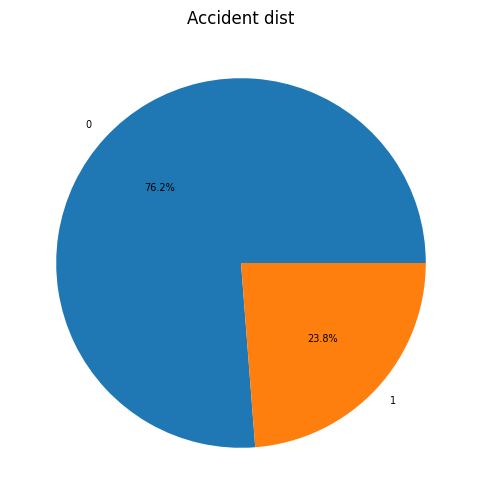

In [168]:
accident_counts = df["accident"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    accident_counts, 
    labels=accident_counts.index, 
    autopct="%1.1f%%", 
    # startangle=90, 
    textprops={"fontsize": 7} 
)

plt.title("Accident dist")
plt.show()

In [171]:
df.clean_title.unique()
df.clean_title.fillna(0)

df.clean_title = df.clean_title.map(lambda x : 1 if x == 'Yes' else 0)

df.clean_title.unique()

array([1, 0])

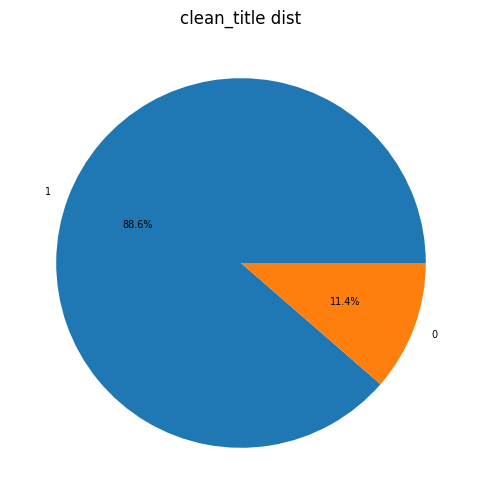

In [172]:
ct_count = df["clean_title"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    ct_count, 
    labels=ct_count.index, 
    autopct="%1.1f%%", 
    # startangle=90, 
    textprops={"fontsize": 7} 
)

plt.title("clean_title dist")
plt.show()

In [173]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [174]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0,1,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,1,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0,1,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0,1,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0,1,97500


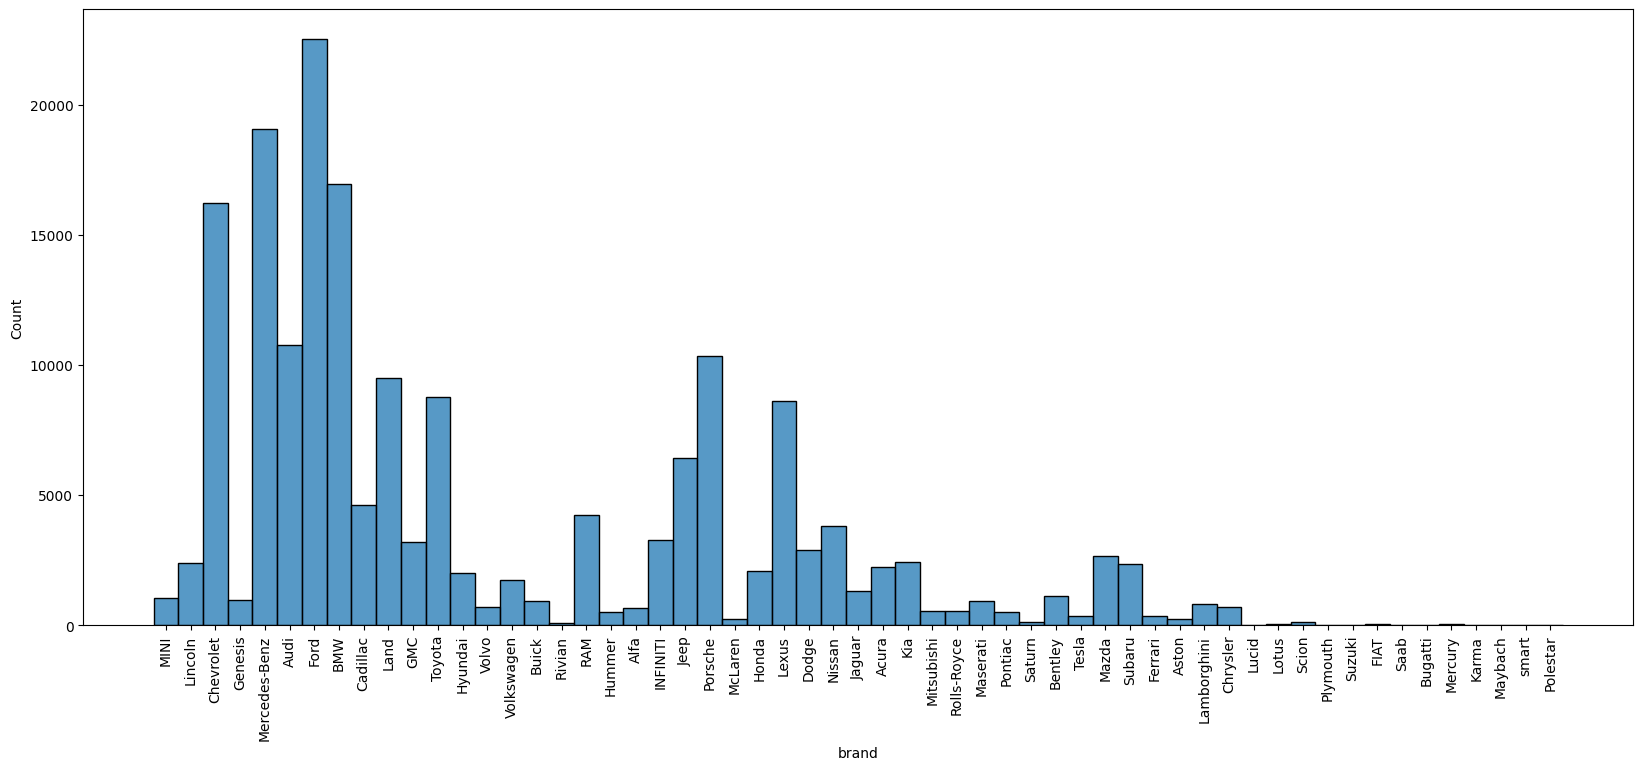

In [186]:
plt.figure(figsize=(20,8))
sns.histplot(df.brand)
plt.xticks(rotation=90)
plt.show()